___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** or other clustering methods, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [64]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [65]:
df.shape

(200, 5)

#### Explore Data

You can rename columns to more usable, if you need.

In [66]:
df = df.rename(columns = {"CustomerID":"Customer_Id","Annual Income (k$)":"Annual_Income",
                          "Spending Score (1-100)":"Spending_Score"})

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_Id     200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


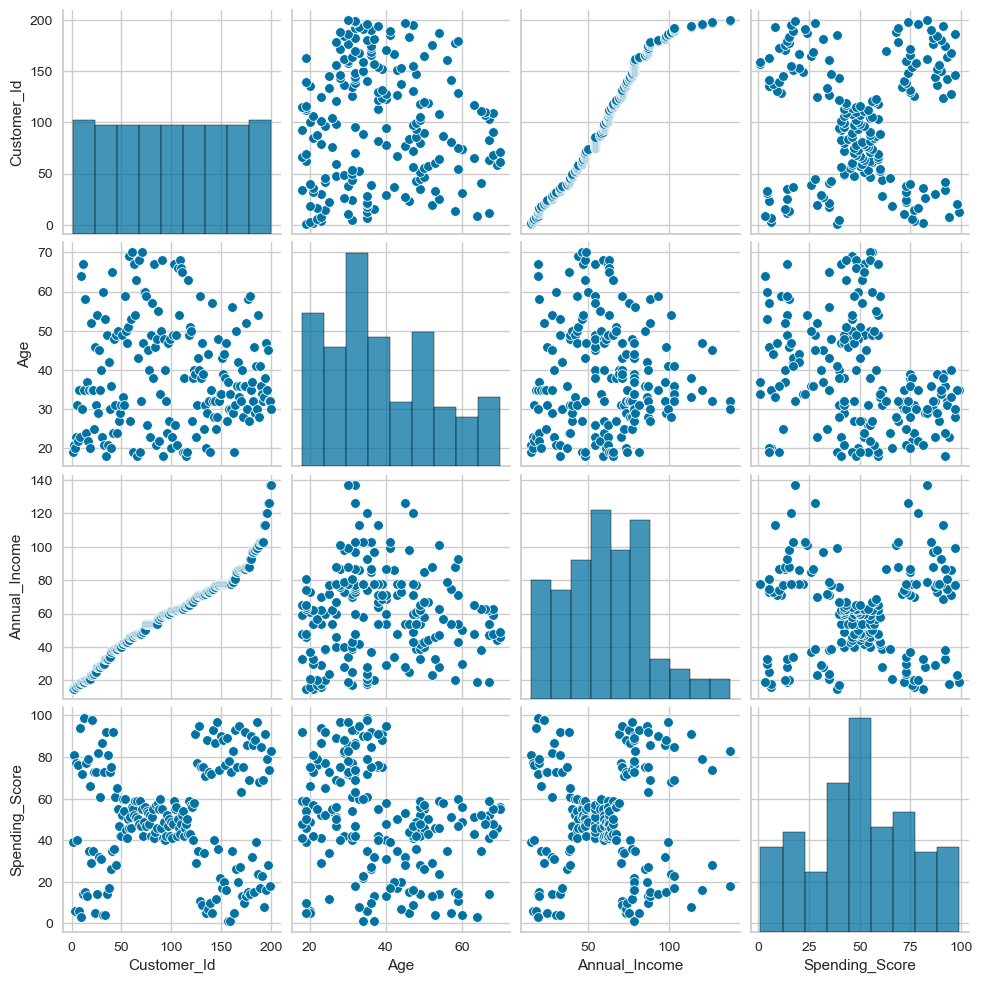

In [69]:
sns.pairplot(df)
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [70]:
X = df.copy()
# unsupervised learning olduğundan train-test split vs yok !

In [71]:
X.head()

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
X2 = X.iloc[:, [2,4]]
X2

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [73]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

# n_clusters=8 (default)
# n_init : centroid'leri random olarak atama işlemini kaç kere yapacağını belirtiyoruz 
# init='k-means++' : (centroid'leri random olarak atıyor normalde algoritma) 'k-means++' ile biz diyoruz ki algoritmaya 
# centroidleri random olarak ata ama  verilerin yoğun olduğu yerlere centroidleri atayarak başla demiş oluyoruz.
# max_iter=300 -------> büyük datalarda bunu artırma ihtiyacı hasıl olabilir.
# random_state: kümelerimizin aynı olması için.Buradaki aynılık 1 dediği bir kümeye bir sonrakinde 0 demesin diye 
# random_state'i sabitliyoruz.

In [74]:
K_means_model.fit(X2)

# fit -------------> algoritma patterneleri tespit ediyor burada (5 cluster olacak şekilde)

KMeans(n_clusters=5, random_state=42)

In [75]:
K_means_model.predict(X2)

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

In [76]:
K_means_model.fit_predict(X2)

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

In [77]:
K_means_model.labels_

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

### Hopkins Test
Hopkins test, a statistical test for randomness of a variable.
Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
The more close 0, the more available to separate clusters

In [78]:
from sklearn.neighbors import BallTree

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

# hopkins : elimdeki data clusteringe ne kadar yatkın bunu ölçen istatistiksel bir yöntem.
# 0.5'den küçükse kümelemeye yatkındır.

In [79]:
X2.shape

(200, 2)

In [80]:
hopkins(X2, X2.shape[0])


# hopkins 0'a yaklaşıkça datam kümelemeye yatkın diyebiliriz.Datam çok büyük olsaydı,X.shape[0] yerine
# buraya bir  sampling_size da belirtebilirdik.
# her çalıştırıldığında farklı sonuç çıkmasının nedeni; arka planda X'den rastgele gözlemler almasıdır.

0.3259403230182774

In [81]:
hopkins(X2, 50)

0.2736012900838155

## Choosing The Optimal Number of Clusters

### Elbow metod

#### *ii. Determine optimal number of clusters*

In [82]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

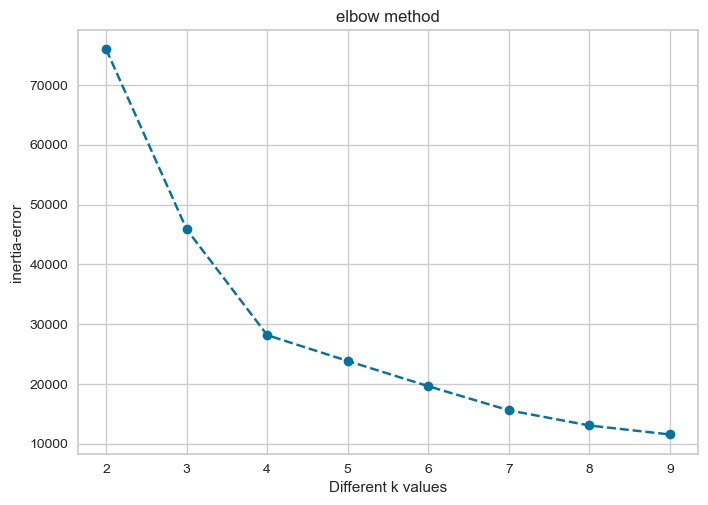

In [83]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [84]:
ssd

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23842.68178795084,
 19626.205656675626,
 15599.088528138525,
 13055.626865965576,
 11552.641818783068]

In [85]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4322.901779
4     4216.476131
5     4027.117129
6     2543.461662
7     1502.985047
dtype: float64

In [86]:
df_diff_1 =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff_1

,0
1,NaN
2,30108.479394
3,17675.093049
4,4322.901779
5,4216.476131
6,4027.117129
7,2543.461662
8,1502.985047


<AxesSubplot:>

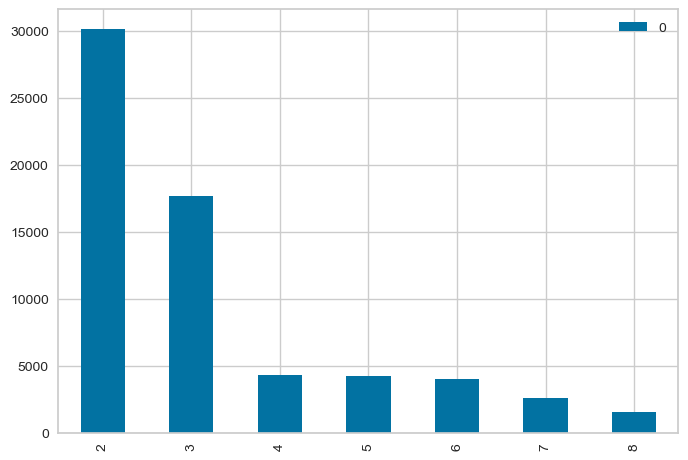

In [87]:
df_diff_1[1:].plot(kind='bar')

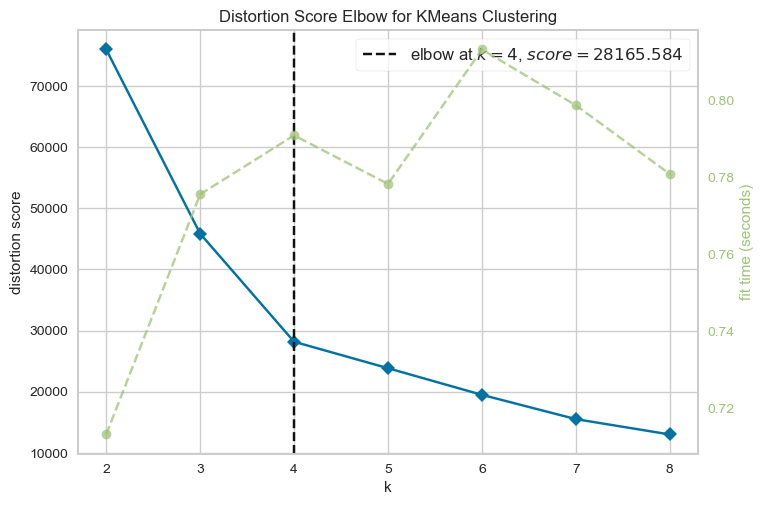

In [88]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [89]:
# scatterplot'a göre optimal k 5 gibiydi , elbow optimal k olarak 4 önerdi , yellowbrickte kendi mantığıyla 4 önerdi .
# Ama biz biliyoruz ki elbow method inertia'yı dikkate alarak çalışıyor ideal kümelemede bizim için kümeler arası 
# mesafe de önemliydi.Bundan dolayı Silhouette analysis yaparak optimal k için bir tavsiye de buradan alacağız.

In [90]:
from sklearn.metrics import silhouette_score
# silhouette_score ; yaptığımız kümelemenin kalitesini ölçen bir metriktir, inertia her küme kendi içerisinde centroidi  
# etrafında ne sıklıkta kümelenmiş bunu ölçüyor ( küme içi mesafelere bakıyor yani) Ama bizim ideal clusteringten anlamamız
# gereken bir de  maximal inter cluster distance idi  ve silhouette_score işte bu durumu  hesaba katıyor.

In [91]:
K_means_model.labels_

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

In [92]:
silhouette_score(X2, K_means_model.labels_)
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.

0.43350225495428363

In [93]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


In [94]:
# n_clusters=2 'de silhouette score yüksek AMA ;
# cluster sayısını 2 seçersem inertia değeri çok yüksek yani kümelerim geniş bir alana yayılacak.
# O yüzden n_clusters=3 ve n_clusters=4 arasındaki silhouette score'ları karşılaştırarak bir karar veriyoruz.
# n_clusters=4 a göre  silhouette score n_clusters=3 a göre daha yuksek çıktı bundan dolayı  n_clusters=4 baz alıyoruz
# burada hesaplanan silhouette score bütün gözlemlerin ortalamasıdır (clusterlara göre)

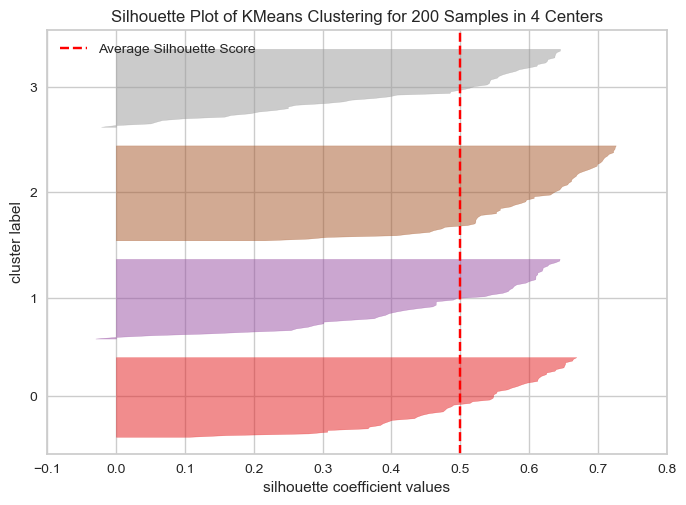

In [95]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, 
                random_state=42)          # n_clusters=4'e karar verdik !
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

# yellowbrick'in bu özelliğiyle bir her bir cluster'ın ayrı ayrı silhouette score'larını görebiliyoruz.

In [96]:
model3.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [97]:
visualizer.silhouette_samples_
# Gözlemlerin ayrı ayrı silhouette score'larını da görebiliriz.

array([ 5.41704401e-01,  6.06427697e-01,  3.90692354e-01,  5.72388690e-01,
        4.85877135e-01,  5.29623931e-01,  5.99685286e-01,  6.45443747e-01,
        4.38661178e-01,  4.77367625e-01,  3.01027300e-01,  6.33591468e-01,
        4.64200102e-01,  5.87165454e-01,  6.11887393e-01,  5.95298366e-01,
        2.49515369e-01, -6.38269698e-04,  5.35146574e-02,  6.43523035e-01,
        2.49515369e-01,  4.72208348e-01,  6.28460918e-01,  5.23057518e-01,
        5.44149704e-01,  7.05479532e-01,  1.80808145e-03,  2.61008835e-01,
        1.32902431e-01,  6.68864152e-01,  4.94735307e-01,  4.06403093e-01,
        5.75372306e-01,  5.94131411e-01,  6.08580878e-01,  6.06427697e-01,
        6.19692628e-01,  5.21751518e-01,  3.01363453e-01,  4.60993550e-01,
        3.93975989e-01,  6.67339529e-01,  3.06655386e-01,  3.03109441e-01,
        1.89220192e-01,  5.00927844e-02,  4.86477440e-01,  6.26659654e-01,
        5.55217490e-01,  5.12603191e-01,  4.89791113e-01,  3.41182419e-01,
        5.42290734e-01,  

In [98]:
labels_1 = (model3.labels_ == 1)
labels_1

array([False, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [99]:
visualizer.silhouette_samples_[labels_1] # silhoutte scores of 1 classes

array([ 0.39069235,  0.59968529,  0.43866118,  0.3010273 ,  0.4642001 ,
        0.61188739,  0.05351466,  0.62846092,  0.5441497 ,  0.00180808,
        0.13290243,  0.49473531,  0.57537231,  0.60858088,  0.61969263,
        0.30136345,  0.18922019,  0.48935675,  0.63722118,  0.39597756,
        0.64405628,  0.33697359,  0.53474313,  0.42078766,  0.40711097,
        0.61800549,  0.56092567,  0.60895931,  0.59458983,  0.5709067 ,
        0.38040952,  0.27855476,  0.56868663,  0.25358842,  0.64338796,
        0.61160444,  0.58119861,  0.4642001 ,  0.45937084, -0.02972614,
        0.62601044,  0.28762596,  0.61914457,  0.37426429,  0.57727112,
        0.60895931,  0.26126639,  0.46455719])

In [100]:
mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_1].mean()
mean_silhoutte_score_1

0.45429047261675404

In [101]:
## bu işlemi 4 cluster için de yapalım : 

In [102]:
#model3.n_clusters
for i in range(4):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0     : 0.5091299145013191
mean silhouette score for label 1     : 0.45429047261675404
mean silhouette score for label 2     : 0.5960779476836082
mean silhouette score for label 3     : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


In [103]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(X2)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [104]:
clusters = model.labels_

In [105]:
X2["predicted_clusters"] = clusters
X2

,Age,Spending_Score,predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


In [106]:
centers = model.cluster_centers_
centers
# feature'ların centoridlerinin koordinatları : 

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

In [107]:
centers[:,0] # centers of  feature
# her cluster için kordinat bilgileri:

array([55.70833333, 43.29166667, 30.1754386 , 27.61702128])

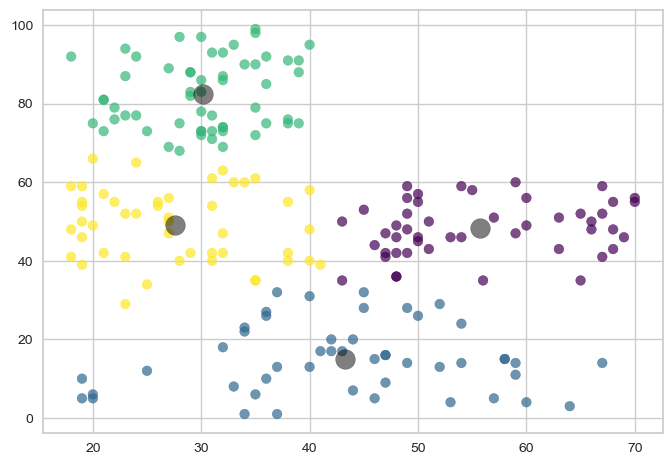

In [108]:
plt.scatter(X2["Age"],
            X2["Spending_Score"],
            c=X2.predicted_clusters,
            cmap="viridis",
            alpha=0.7)  # X2.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1], 
            c='black', 
            s=200, 
            alpha=0.5)

<AxesSubplot:xlabel='predicted_clusters', ylabel='Spending_Score'>

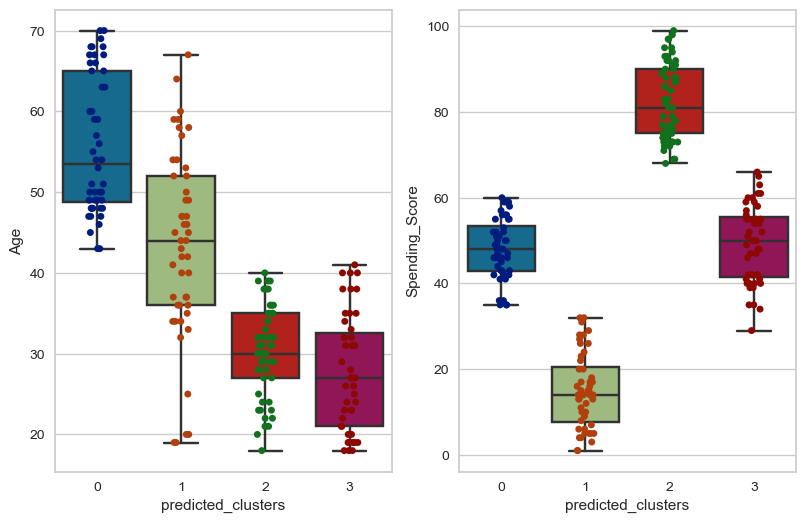

In [109]:

plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "predicted_clusters", data = X2)
sns.stripplot(y = "Age", x = "predicted_clusters", data = X2, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X2)
sns.stripplot(y ="Spending_Score", x = "predicted_clusters", data = X2, palette="dark")

### Why silhouette_score is negative?

![image.png](attachment:image.png)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [110]:
X3 = X.iloc[:, [3,4]]
X3

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [111]:
hopkins(X3, X3.shape[0])

0.2968393470393516

In [112]:
## X2 veri kümesiyle hopkins score 0.29872568967811075 bulmuştuk.

## Elbow metod

#### *ii. Determine optimal number of clusters*

In [113]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X3)
    ssd.append(model.inertia_)
    

# range'i 2'den başlattığımıza dikkat edelim eğer 1'den başlatırsak elbow'dan optimal k olarak hep 2'yi görürüz.
# inertia  kümelerdeki gözlemlerin centroidlerini  ne sıklıkta çevrelediğini hesaplar.
# inertia'nın sadece küme içine odaklandığına dikkat edelim.
# inertia ne kadar küçükse kümeler kendi içerisinde  centroidlerini o kadar iyi çevrelemiştir.    

Text(0.5, 1.0, 'elbow method')

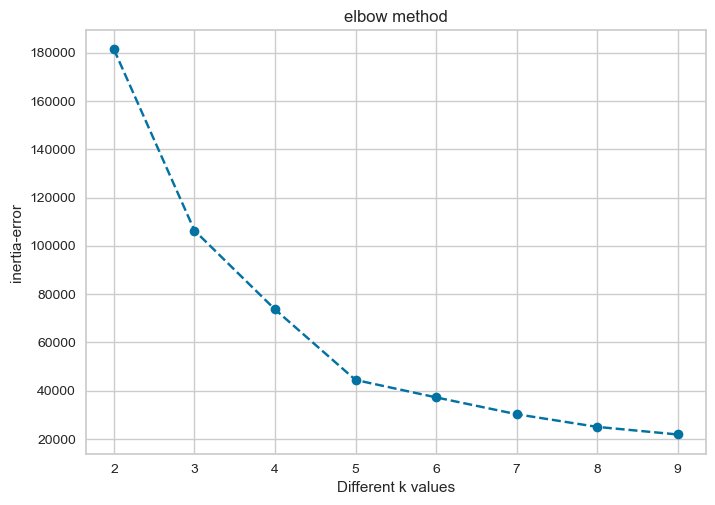

In [114]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [115]:
ssd

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21862.092672182887]

In [116]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3149.746677
dtype: float64

In [117]:
df_diff_1 =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff_1

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3149.746677


<AxesSubplot:>

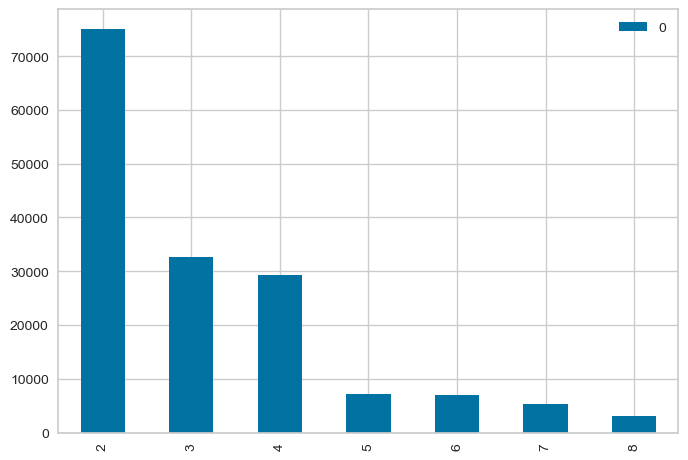

In [118]:
df_diff_1[1:].plot(kind='bar')

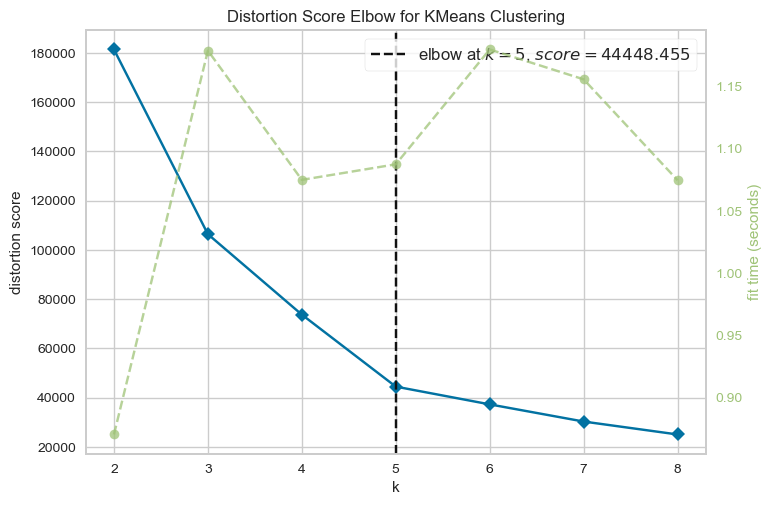

In [119]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X3)        # Fit the data to the visualizer
visualizer.show();

#### *iii. Apply K Means*

In [120]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


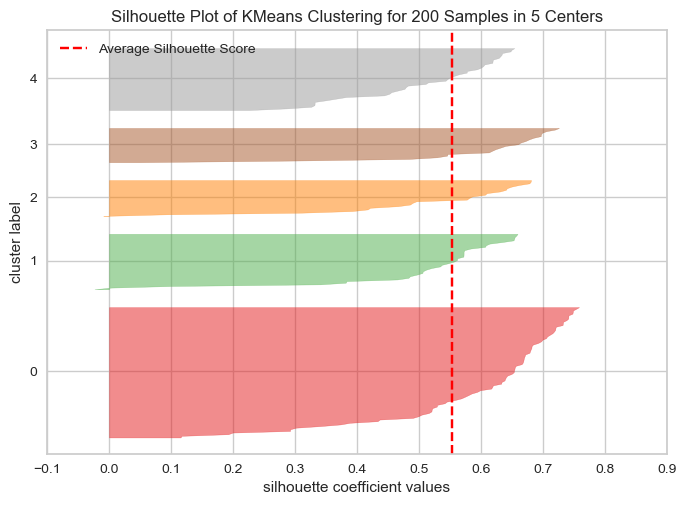

In [121]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X3)    # Fit the data to the visualizer
visualizer.poof();

In [122]:
for i in range(model3.n_clusters):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5966512190217801
mean silhouette score for label 1      : 0.5039873487056818
mean silhouette score for label 2      : 0.5122676140736505
mean silhouette score for label 3      : 0.5990128687006722
mean silhouette score for label 4      : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


## iv. Visualizing and Labeling All the Clusters

In [123]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit_predict(X3)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [124]:
clusters = model.labels_

In [125]:
X3["predicted_clusters"] = clusters
X3

,Annual_Income,Spending_Score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [126]:
centers = model.cluster_centers_
centers
# feature'ların centoridlerinin koordinatları : 

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [127]:
centers[:,0] # centers of  feature
# her cluster için kordinat bilgileri:

array([55.2962963 , 88.2       , 26.30434783, 25.72727273, 86.53846154])

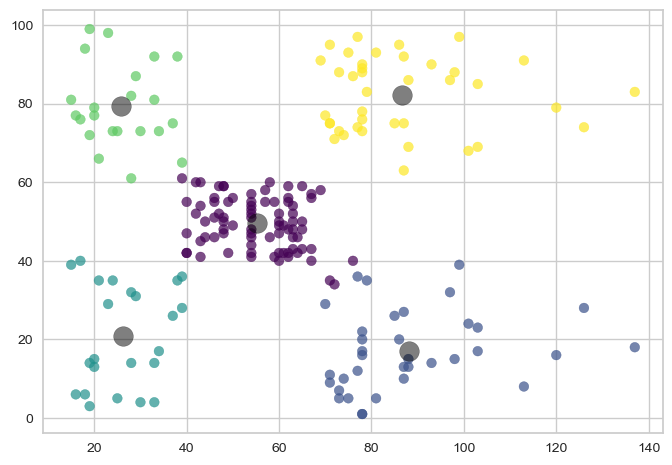

In [128]:
plt.scatter(X3["Annual_Income"],
            X3["Spending_Score"],
            c=X3.predicted_clusters,
            cmap="viridis",
            alpha=0.7)  # X3.predicted_clusters
plt.scatter(centers[:, 0],
            centers[:, 1], 
            c='black', 
            s=200, 
            alpha=0.5)

<AxesSubplot:xlabel='predicted_clusters', ylabel='Spending_Score'>

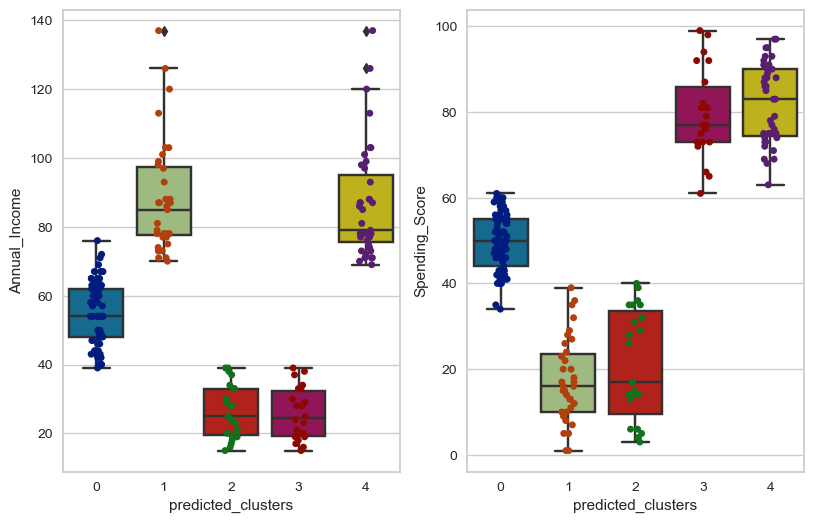

In [129]:

plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Annual_Income", x = "predicted_clusters", data = X3)
sns.stripplot(y = "Annual_Income", x = "predicted_clusters", data = X3, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X3)
sns.stripplot(y ="Spending_Score", x = "predicted_clusters", data = X3, palette="dark")

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [130]:
from scipy.cluster.hierarchy import dendrogram, linkage

# affinity (yakınlık) hyper-parametresi gözlemler arası mesafenin nasıl ölçüleceğini belirtir. Defaultu euclidean'dır.
# linkage hyper-parametresi Bu mesafelerin neye göre (ward, compelete, single, average) ölçüleceğini belirtir.

In [131]:
X

,Customer_Id,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [132]:
X2 = X.iloc[:, [2,4]]
X2

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [133]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

# dendograma vermek üzere datamızı ve mesafelerin neye göre ölçüleceği bilgisini linkage fonksiyonuna veriyoruz.

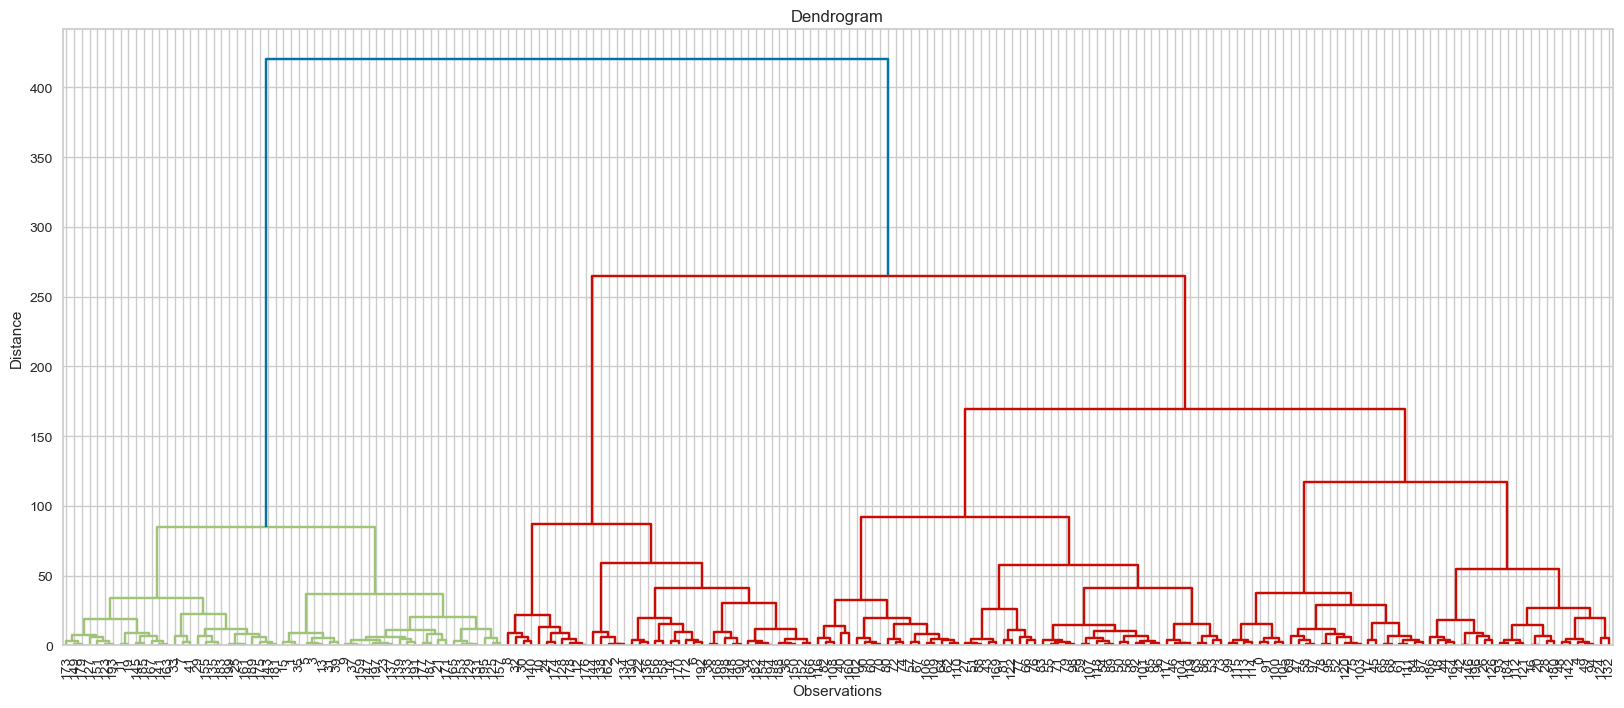

In [134]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

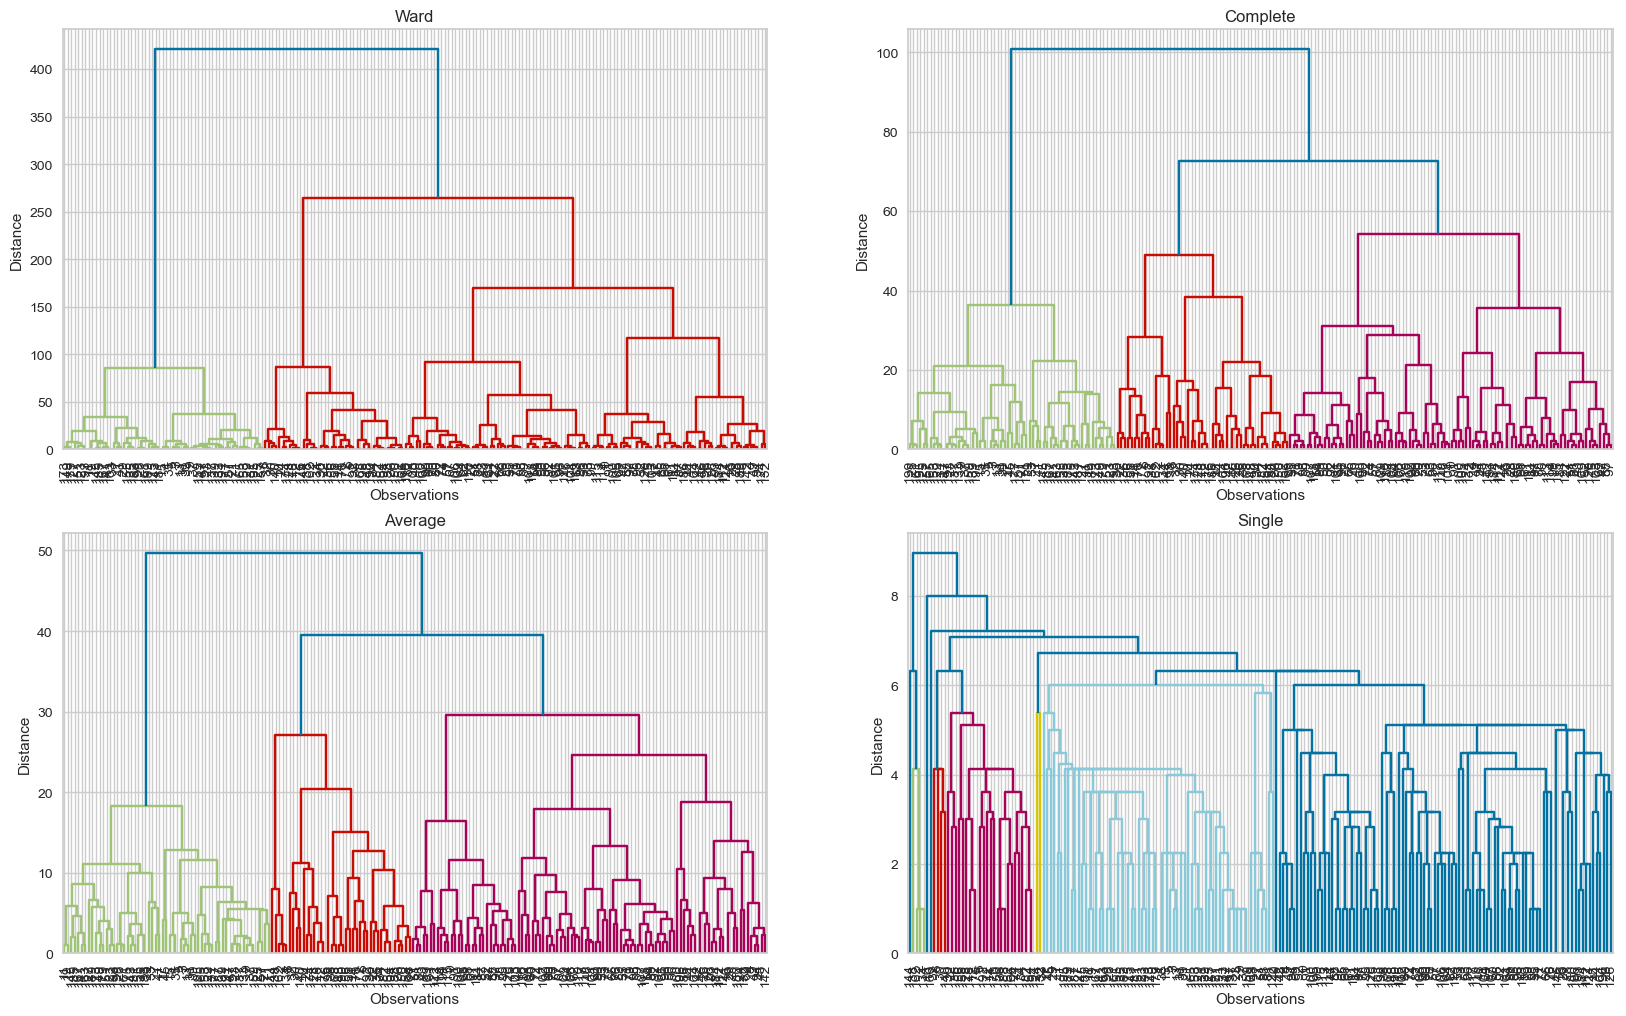

In [135]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# kümeler içi minimum kümeler arası maksimum mesafeyi ward sağladığından ward ile devam edeceğiz.
# dendogramın mavi çizgi ile gösterdiği bize tavsiye ettiği küme sayısıdır. Ancak dendogram kümeler arası mesafeyi max 
# yapacak şekilde bize bir öneride bulunur ama biz yine sadece dendogramdan değil. scatter plot ve silhouette scoredan
# faydalanıp ona göre karar vereceğiz.

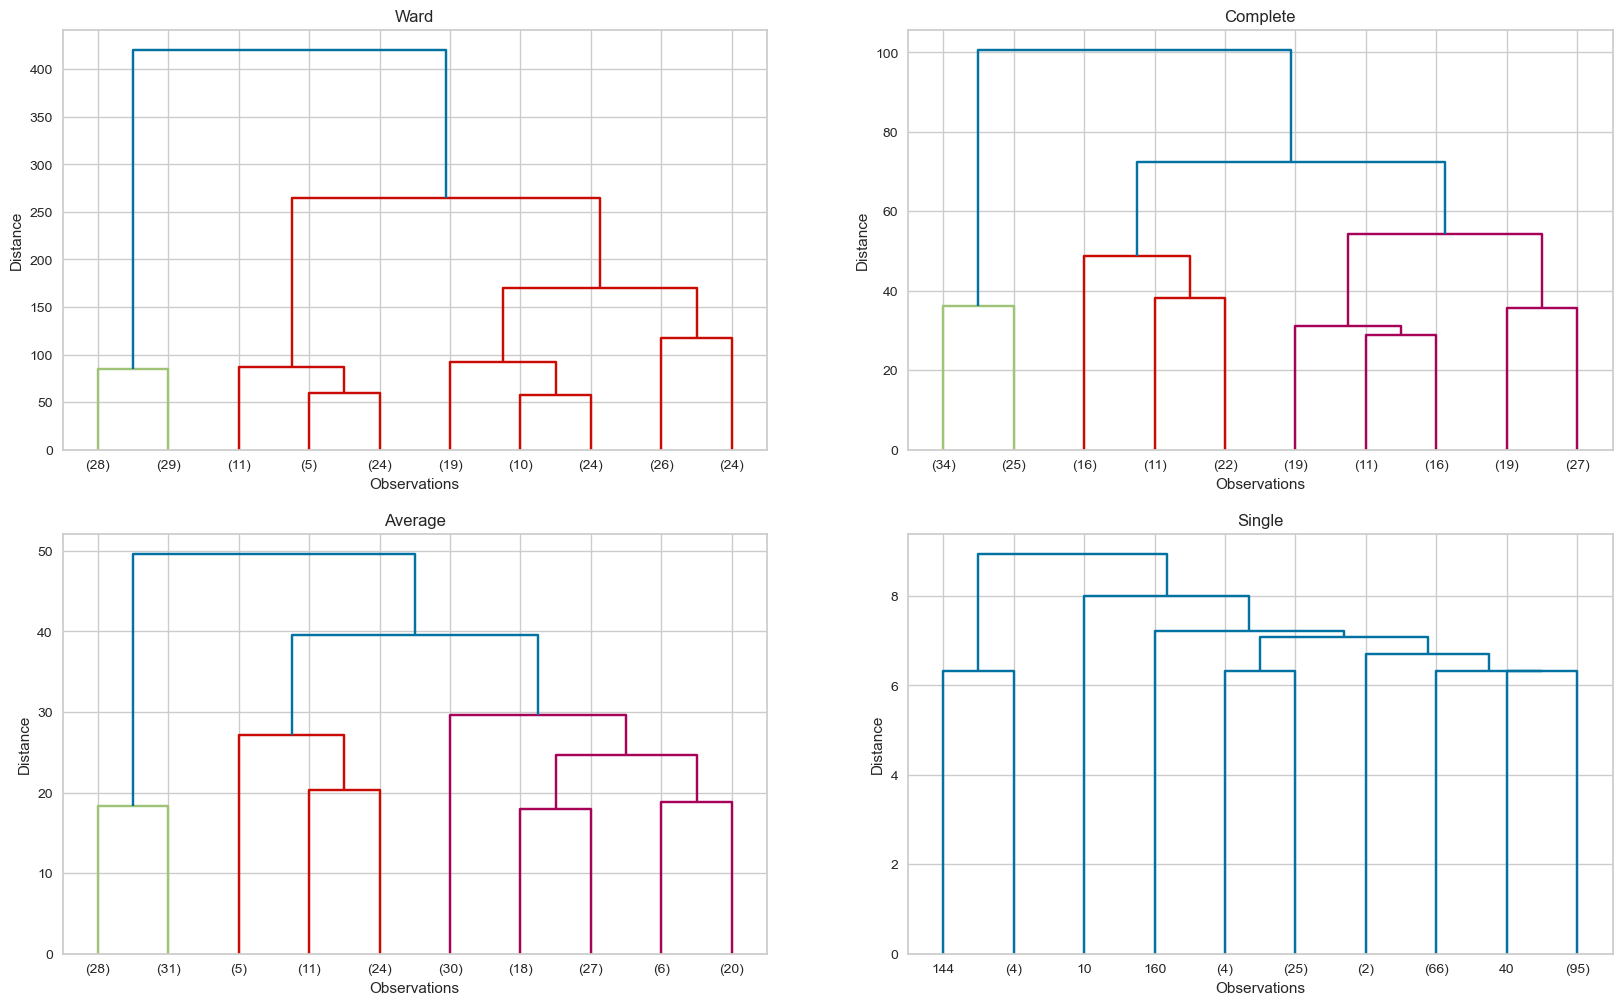

In [136]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# truncate_mode='lastp' ve p=10 ayarlanarak dendogramın sadece son 10 kümeyi bize gösterecek şekilde sadeleştirme yapması
# sağlanır.

## Clustering based on Annual Income and Spending Score- x2

In [137]:
X3 = X.iloc[:, [3,4]]
X3

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [138]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete")
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

# dendograma vermek üzere datamızı ve mesafelerin neye göre ölçüleceği bilgisini linkage fonksiyonuna veriyoruz.

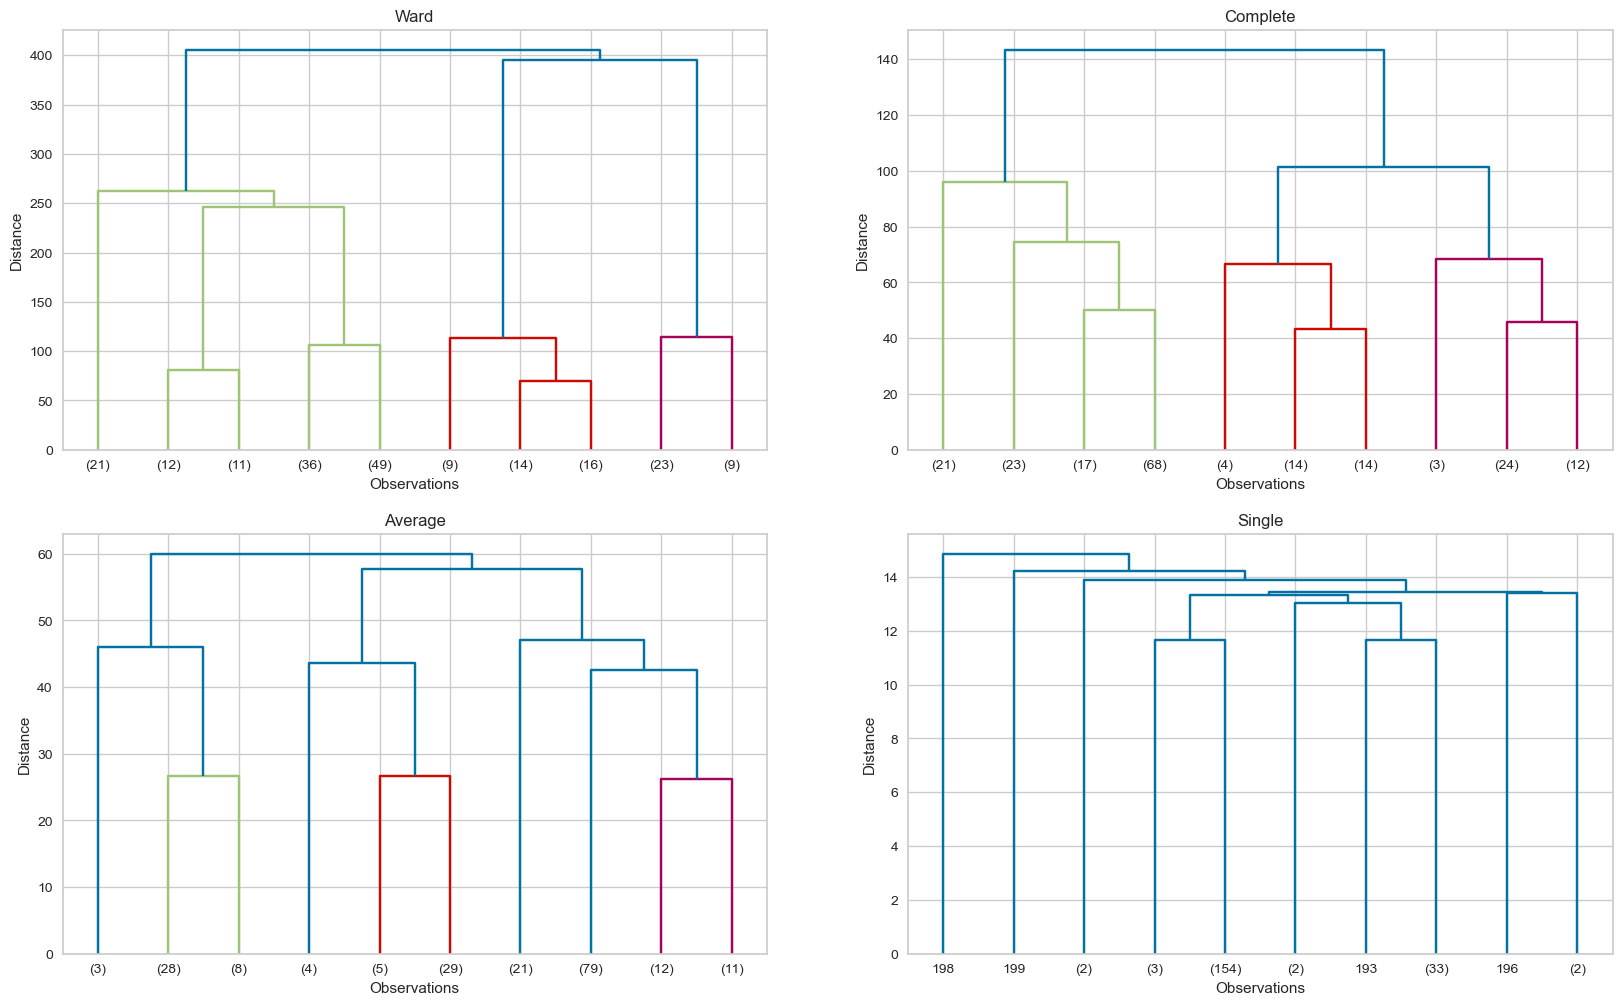

In [139]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# truncate_mode='lastp' ve p=10 ayarlanarak dendogramın sadece son 10 kümeyi bize gösterecek şekilde sadeleştirme yapması
# sağlanır.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [140]:
# İdeal kümeleme, minimum küme içi mesafe ve maksimum kümeler arası mesafe ile karakterize edilir

In [141]:
from sklearn.cluster import AgglomerativeClustering

In [142]:
model = AgglomerativeClustering(n_clusters=2, 
                                affinity="euclidean",
                                linkage="ward")
# default değerleri ile modeli çalıştırıyoruz.

In [143]:
model.fit_predict(X2)

# k-means'te olduğu hierarchical clustarın predict özelliği yoktur. Tek başına çalışmaz

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [144]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

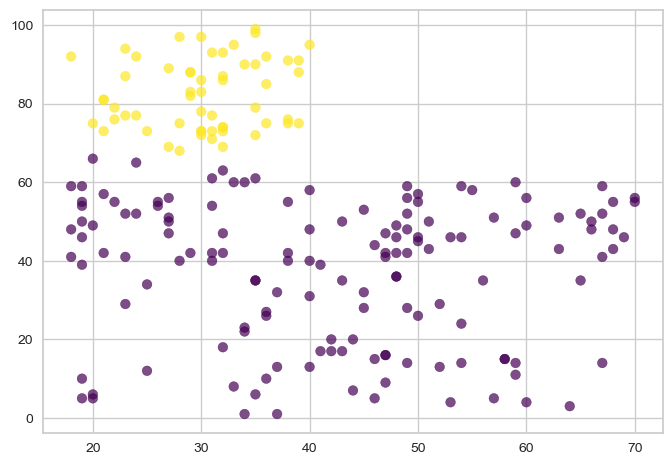

In [145]:
plt.scatter(X2["Age"],
            X2["Spending_Score"],
            c=model.labels_,
            cmap="viridis",
            alpha=0.7);

In [146]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

# n_clusters=2 'de silhouette score yüksek AMA ;
# dendograma göre cluster sayısını 2 seçersem scatterplata göre kümelerden biri çok  geniş bir alana yayıldığını yukarıda görmüş olduk .
# bundan dolayı biz  n_clusters=4 deki silhouette score nun daha yuksek olması hasebiyle modelimizi buna göre kuruyoruz.
# burada hesaplanan silhouette score bütün gözlemlerin ortalamasıdır (clusterlara göre)

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [147]:
model1 = AgglomerativeClustering(n_clusters=4, 
                                 affinity="euclidean",
                                 linkage="ward")
model1.fit_predict(X2)

# n_cluster=4'e göre modeli yeniden kuruyoruz.

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [148]:
model1.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

#### Annual Income and Spending Score- x2

In [149]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X3, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [166]:
# dendogram bize  n_clusters=3, u tavsiye etti onu da asğıda çzdirmiş olduk .. hem  birinci kumelememiz çok geniş bir
# alana yayıldığından hem Silhouette Score for 5 clusters: 0.5529945955148897 daha yuksek olduğundan
# n_clusters=5 e göre çizdirmeye karar kılıyoruz . 

model2 = AgglomerativeClustering(n_clusters=5, 
                                affinity="euclidean",
                                linkage="ward")

In [167]:
model2.fit_predict(X3)

# k-means'te olduğu hierarchical clustarın predict özelliği yoktur. Tek başına çalışmaz

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [168]:
model2.labels_
# fit veya fit_predict yaptıktan sonra label_ attirbute ile clusterları görebiliriz.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

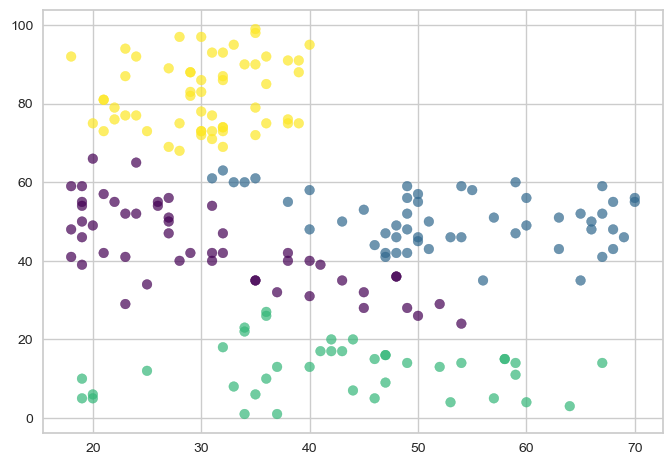

In [153]:
plt.scatter(X2["Age"],
            X2["Spending_Score"],
            c=model1.labels_,
            cmap="viridis",
            alpha=0.7);

In [154]:
clusters = model1.labels_

In [155]:
X2["predicted_clusters"] = clusters
X2

,Age,Spending_Score,predicted_clusters
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0
...,...,...,...
195,35,79,3
196,45,28,0
197,32,74,3
198,32,18,2


<AxesSubplot:xlabel='predicted_clusters', ylabel='Spending_Score'>

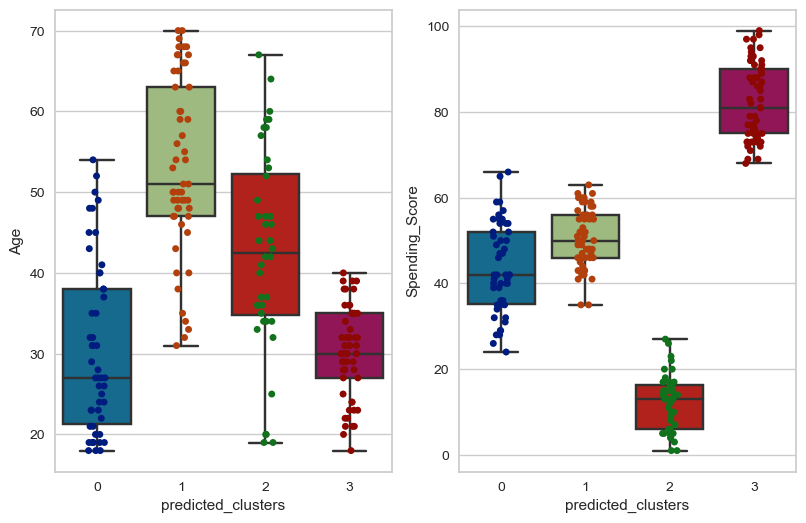

In [156]:

plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Age", x = "predicted_clusters", data = X2)
sns.stripplot(y = "Age", x = "predicted_clusters", data = X2, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X2)
sns.stripplot(y ="Spending_Score", x = "predicted_clusters", data = X2, palette="dark")

#### Annual Income and Spending Score- x2

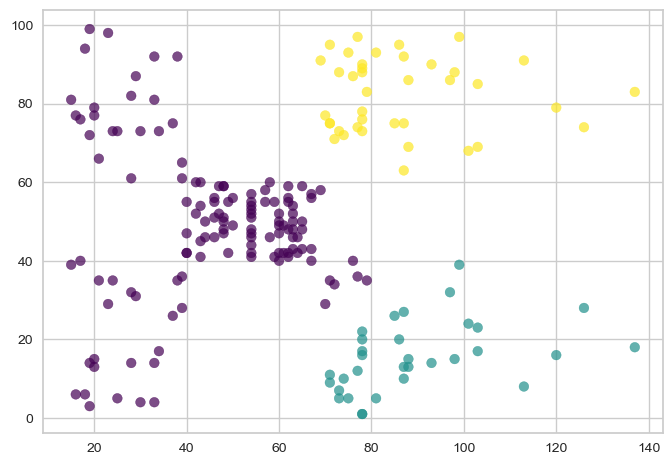

In [157]:
# dendogram bize  n_clusters=3, u tavsiye etti onu da asğıda çzdirmiş olduk .. hem  birinci kumelememiz çok geniş bir
# alana yayıldığından hem Silhouette Score for 5 clusters: 0.5529945955148897 daha yuksek olduğundan
# n_clusters=5 e göre çizdirmeye karar kılıyoruz . 

plt.scatter(X3["Annual_Income"],
            X3["Spending_Score"], 
            c=model2.labels_,
            cmap="viridis",
            alpha=0.7);

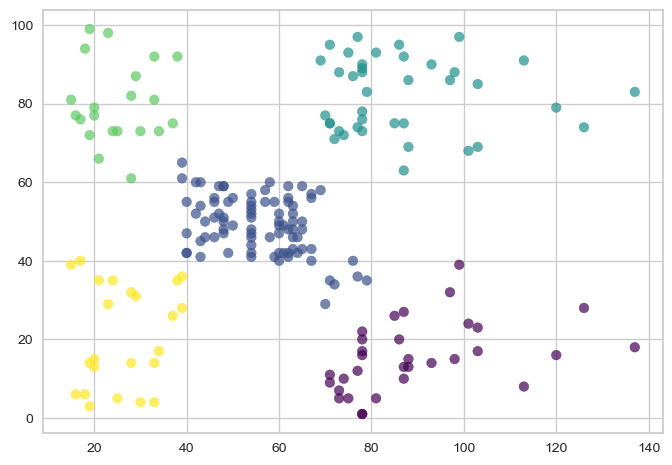

In [169]:
plt.scatter(X3["Annual_Income"],
            X3["Spending_Score"], 
            c=model2.labels_,
            cmap="viridis",
            alpha=0.7);

In [170]:
clusters = model2.labels_

In [171]:
X3["predicted_clusters"] = clusters
X3

,Annual_Income,Spending_Score,predicted_clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


<AxesSubplot:xlabel='predicted_clusters', ylabel='Spending_Score'>

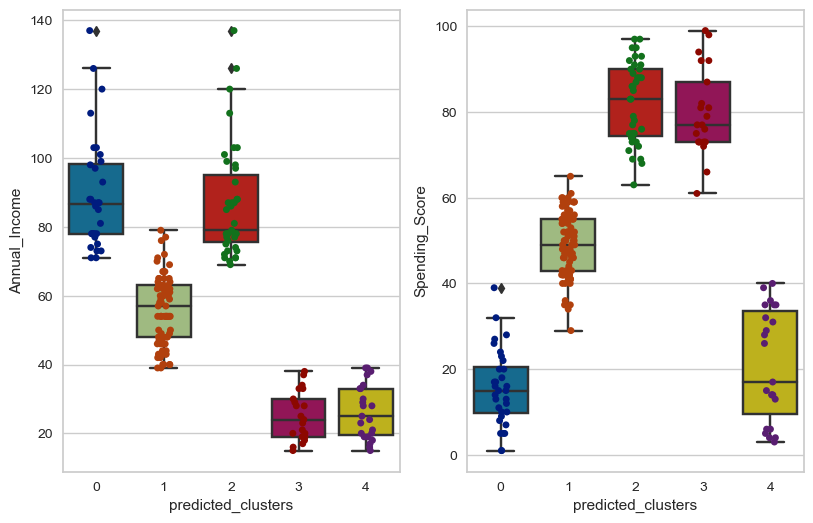

In [172]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Annual_Income", x = "predicted_clusters", data = X3)
sns.stripplot(y = "Annual_Income", x = "predicted_clusters", data = X3, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "Spending_Score", x = "predicted_clusters", data = X3)
sns.stripplot(y ="Spending_Score", x = "predicted_clusters", data = X3, palette="dark")

#### Interpretation based on Age and Spending Score- x1

<AxesSubplot:ylabel='predicted_clusters'>

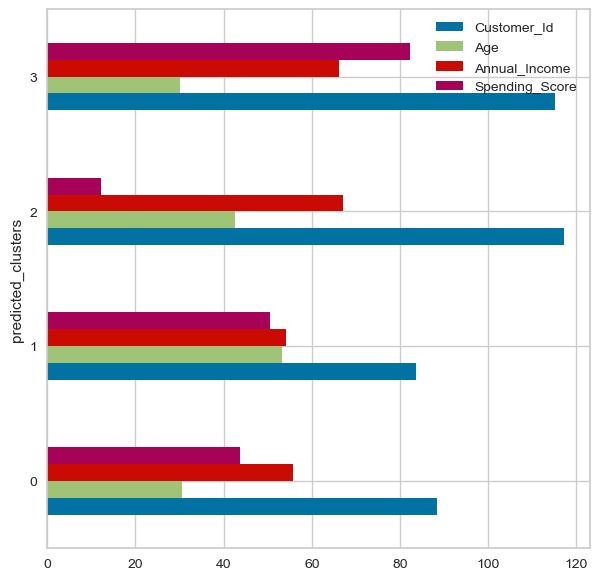

In [184]:
pd.concat([df, X2["predicted_clusters"]], axis=1).drop(columns=["Gender"]).groupby(["predicted_clusters"]).mean().plot(kind="barh", figsize=(7,7))

### Conclusion

In [ ]:

küme 0 : Yaş ortalaması 30 civarındadır,  annula_income kısmen yuksek sayılır spending_scores ona göre bir tık azdır. Daha fazla harcamayı yönlendirmek için neler yapılabileceği araştırılmalıdır.

Küme 1: Yaş ortalaması 55 civarında, Hem annula_income hem de spending_scores ortalama olarak yakın sayılır . Olabilir hediye çekleri ile alışverişe yönlendirildi.. 

küme 2 : Yaş ortalaması 45 civarındadır. annula_income çok yüksek ama spending_scores çok düşük. Bu grup hedef kitlemizdir ve bu grup için harcamaya yönelik özel stratejiler geliştirilmelidir. 

Küme 3: Yaş ortalaması 30 civarında, yıllık gelir ve spending_score çok yüksek. Bu grup sadık müşterilerimizden oluşmaktadır.
    Şirketimiz ana kârını bu gruptan elde etmektedir. Kaçırmamak için çok özel promosyonlar yapılabilir

#### Interpretation based on Annual Income and Spending Score- x2

<AxesSubplot:ylabel='Gender,predicted_clusters'>

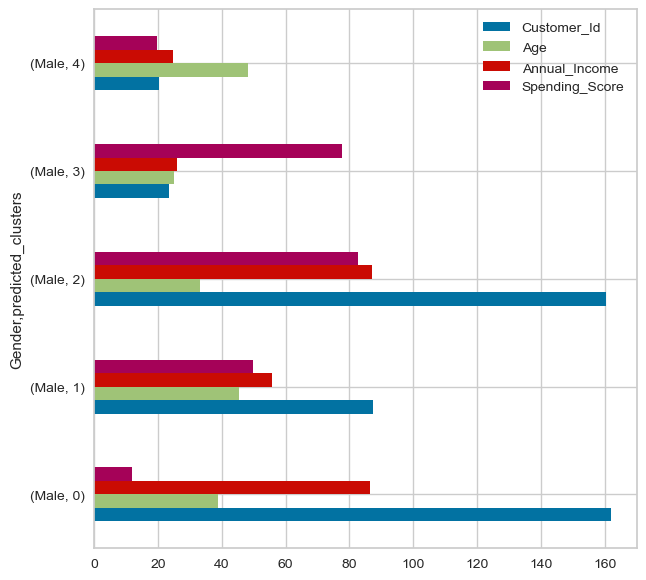

In [187]:
pd.concat([df, X3["predicted_clusters"]], axis=1).groupby(["Gender","predicted_clusters"]).mean()[5:].plot(kind="barh", figsize=(7,7))

# Erkek

In [ ]:

küme 0 : Yaş ortalaması 40 civarındadır, annula_income çok yüksek ama spending_scores çok düşük. Bu grup hedef kitlemizdir ve bu grup daha çok alışveriş yapması için özel stratejiler geliştirilmelidir.

Küme 1: Yaş ortalaması 45 civarında, hem annula_income hem de spending_scores ortalama olarak yakın sayılır. Daha fazla harcamaya yönlendirmek için neler yapılabileceği araştırılmalıdır.

küme 2 : Yaş ortalaması 30 civarındadır. yıllık gelir ve spending_score çok yüksek. Bu grup sadık müşterilerimizden oluşmaktadır. Şirketimiz ana kârını bu gruptan elde etmektedir. Kaçırmamak için çok özel promosyonlar yapılabilir.

Küme 3: Yaş ortalaması 25 civarındadır. Düşük annual_income ancak çok yüksek harcama puanları. Bu Grup çok fazla alışveriş yapıyor, ancak çok fazla kar getirmiyorlar.

küme 4: Yaş ortalaması 50 civarındadır. Hem annula_income hem de spending_scores düşüktür. Olabilir hediye çekleri ile alışverişe yönlendirildi.

<AxesSubplot:ylabel='Gender,predicted_clusters'>

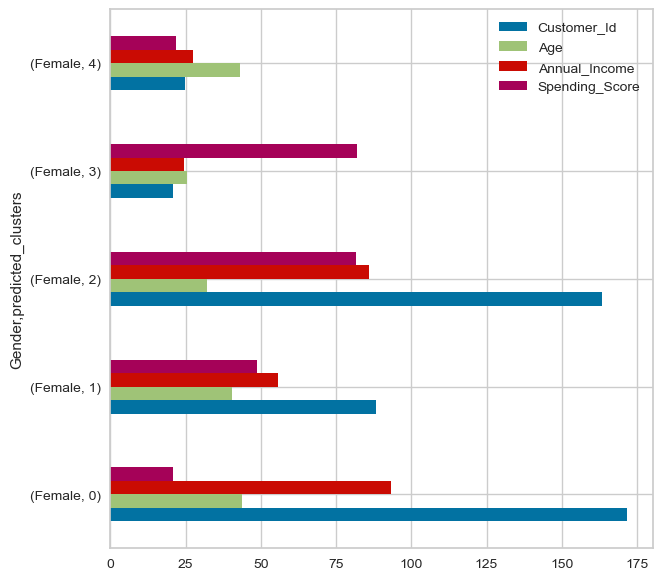

In [188]:
pd.concat([df, X3["predicted_clusters"]], axis=1).groupby(["Gender","predicted_clusters"]).mean()[:5].plot(kind="barh", figsize=(7,7))

# kadın

In [ ]:

küme 0 : Yaş ortalaması 45 civarındadır, annula_income çok yüksek ama spending_scores çok düşük. Bu grup hedef kitlemizdir ve bu grup daha çok alışveriş yapması için özel stratejiler geliştirilmelidir.

Küme 1: Yaş ortalaması 35 civarında, hem annula_income hem de spending_scores ortalama olarak yakın sayılır. Daha fazla harcamaya yönlendirmek için neler yapılabileceği araştırılmalıdır.

küme 2 : Yaş ortalaması 30 civarındadır. yıllık gelir ve spending_score çok yüksek. Bu grup sadık müşterilerimizden oluşmaktadır. Şirketimiz ana kârını bu gruptan elde etmektedir. Kaçırmamak için çok özel promosyonlar yapılabilir.

Küme 3: Yaş ortalaması 25 civarındadır. Düşük annual_income ancak çok yüksek harcama puanları. Bu Grup çok fazla alışveriş yapıyor, ancak çok fazla kar getirmiyorlar.

küme 4: Yaş ortalaması 40 civarındadır. Hem annula_income hem de spending_scores düşüktür. Olabilir hediye çekleri ile alışverişe yönlendirildi.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___